In [31]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# StandardScaler 
from sklearn.preprocessing import StandardScaler

# PCA - optimize ML algorithms by applying Principal Component Analysis
# reduces the number of input features or dimensions
# analysizes weight of their contribution to the variance in the dataset
# reduces dimensions that still contain as much info of original dataset as much as possible
from sklearn.decomposition import PCA

#TSNE (dimensionality reduction for KMEANS to 2 or 3; 
#sorts unlabeled data into clusters for visualization) 
from sklearn.manifold import TSNE

#K-means (upsupervised learning algorithm used to identify
# clusters and solve clustering issues. k prepresents the number of clusters)
from sklearn.cluster import KMeans

# train_test_split
from sklearn.model_selection import train_test_split

In [32]:
# Import the myopia data from a CSV

file_path = Path("myopia.csv")
myopia_df = pd.read_csv(file_path)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [33]:
# PREPROCESSING: Drop null values
null = myopia_df.isnull().sum()
null

AGE          0
SPHEQ        0
AL           0
ACD          0
LT           0
VCD          0
SPORTHR      0
READHR       0
COMPHR       0
STUDYHR      0
TVHR         0
DIOPTERHR    0
MOMMY        0
DADMY        0
MYOPIC       0
dtype: int64

In [34]:
# # PREPROCESSING: drop duplicate rows
duplicate = myopia_df.duplicated().sum()
duplicate

0

In [35]:
# Create new dataframes to pull out the Labels (MYOPIC column) from the features
myopia_df2 = myopia_df.drop(["MYOPIC"], axis=1)
labels = myopia_df['MYOPIC']
myopia_df2


,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0


In [36]:
# Create a StandardScale for the features in myopia_df2
scaler = StandardScaler()
scaled_features = scaler.fit_transform(myopia_df2)

# View the dimentions
print('Dimensions:', scaled_features.shape, 'features')
scaled_features

Dimensions: (618, 14) features


array([[-4.20219106e-01, -1.36391690e+00, -8.92861464e-01, ...,
         4.98303926e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -3.08612235e-01, -1.71839800e-01, ...,
        -8.75087555e-01,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01,  6.04386289e-01, -9.97682023e-03, ...,
        -7.50233784e-01, -1.01302987e+00, -9.96768974e-01],
       ...,
       [-4.20219106e-01,  1.65169621e+00,  6.52187361e-01, ...,
        -1.37450264e+00,  9.87137728e-01,  1.00324150e+00],
       [-4.20219106e-01, -2.17472219e-01, -8.48716244e-01, ...,
        -1.88391815e-01, -1.01302987e+00, -9.96768974e-01],
       [-4.20219106e-01,  1.58339808e-03, -3.48415042e-01, ...,
        -7.50233784e-01,  9.87137728e-01,  1.00324150e+00]])

**Reduce the dimensionality using Principal Component Analysis (PCA)** 

The number of features was reduced from 14 to 10 features as noted in shape method.

In [37]:


#Initialize the model and keep 90% of the explained variance in the dimensionality reduction
pca = PCA(n_components=0.9)
scaled_features_pca = pca.fit_transform(scaled_features)

#View the dimensions
scaled_features_pca.shape

(618, 10)

In [38]:
# View the explained variance of the remaining 2 features
pca.explained_variance_ratio_.sum()
print("The explained variance: ", pca.explained_variance_ratio_)

The explained variance:  [0.21177355 0.15659716 0.08688023 0.08301762 0.07584858 0.06997878
 0.06486986 0.06377808 0.05393666 0.05205566]


In [39]:
# Create a DataFrame of the PCA data
myopia_df2_pca = pd.DataFrame(
    data=scaled_features_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8", "PC9", "PC10"]
)
myopia_df2_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183


**Analysis of the Principal Components (% are rounded)**

1. PC1 contains approximately 21% of the variance. 
2. PC2 contains approximately 16% of the variance. 
3. PC3 contains approximately 9% of the variance. 
4. PC4 contains approximately 8% of the variance. 
5. PC5 contains approximately 8% of the variance. 
6. PC6 contains approximately 7% of the variance. '
7. PC7 contains approximately 6% of the variance. 
8. PC8 contains approximately 6% of the variance. 
9. PC9 contains approximately 5% of the variance. 
10. PC10 contains approximately 5% of the variance. 

There remains ~91% of the data in the initial dataset.  Next, increasing the principal components to 3 will be reviewed to understand if the explained variance goes up. 

In [40]:
# Initialize the t-sne model; 
# Use learning_rate of 35 on a scale of 10-1000
tsne_model = TSNE(learning_rate=35, init = "pca", n_iter=500)

# Fit t-sne model to PCA training data and transform data
tsne_features = tsne_model.fit_transform(scaled_features_pca)

C:\Users\19179\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [41]:
# Review the shape of the data
tsne_features.shape

(618, 2)

**Are there distinct clusters?**

There are no (zero) distinct clusters in the Plot. The two colors overlap and are mixed together.


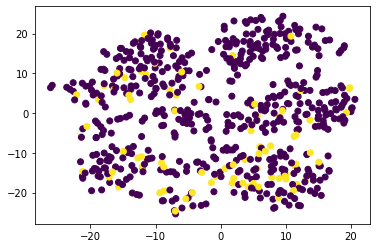

In [42]:
# Plot the results

plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

In [43]:
# Extract the values from the results of the t-sne model
labels.value_counts()

0    537
1     81
Name: MYOPIC, dtype: int64

In [44]:
# Perform cluster analysis with K-means clustering
inertia = []
k= list(range(1,11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_df2)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\19179\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,234007.104068
1,2,126211.687610
2,3,93108.597058
3,4,78236.040289
4,5,67245.959484


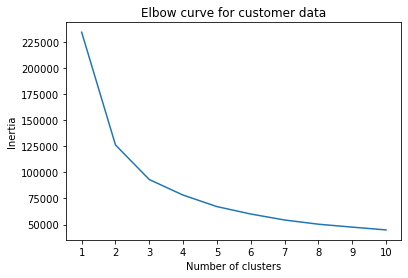

In [45]:
# Plot the elbow curve to find the best candidate for k (the # of clusters)
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for customer data')
plt.show()

*Where in the elbow in the above line chart what is the k value?*

The elbow appears to occur at 3. 

In [71]:
# Predicting clusters with k=3

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(myopia_df2_pca)

# Predict clusters
predictions = model.predict(myopia_df2_pca)

# Add the predicted class column to the dataframe
myopia_df2_pca["class"] = model.labels_
myopia_df2_pca.head()



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,1
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,0
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,1
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,1
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,0


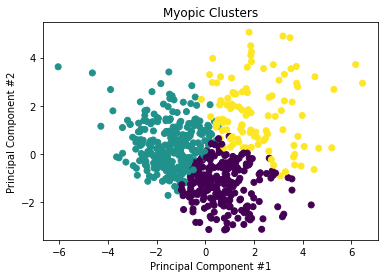

In [73]:
# Visualize k=3 clusters
plt.scatter(x=myopia_df2_pca['PC1'], y=myopia_df2_pca['PC2'], c=myopia_df2_pca['class'])
plt.xlabel('Principal Component #1')
plt.ylabel('Principal Component #2')
plt.title('Myopic Clusters')
plt.show()

 

*Can patients be clustered?*

The initial scatter plot shows that 2 clusters are not visible. Using 3 clusters, the groups are visible, however, there is more work to do to improve results. 
